##### Vamos desvendar os segredos do ETL (Extração, Transformação e Carregamento) com Python. Aprenda de forma simplificada a utilizar bibliotecas poderosas para extrair e transformar dados de diferentes fontes, incluindo planilhas, de maneira eficiente. Vamos explorar técnicas essenciais de limpeza e organização dos dados para garantir a qualidade e consistência das informações. Prepare-se para descobrir como transformar dados brutos em tomadas de decisão! 

In [1]:
import pandas as pd

dados = pd.read_csv('feedbacks.csv', delimiter=';')

##### Ler a informações dos dados

In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nota        7 non-null      int64 
 1   comentario  7 non-null      object
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


##### Verificar está tudo ok, se precisa demilitar ou não.

In [6]:
dados.head(10)

,nota,comentario
0,10,"Excelente Bootcamp, estou muito satisfeita!"
1,9,"Bootcamp top, mas mentorias de IA o tornariam ..."
2,6,"Um Bootcamp razoável, torcendo para o próximo ..."
3,10,"Bootcamp incrível, continuem potencializando a..."
4,7,"O Bootcamp foi ok, nada de especial."
5,9,Show de bola!
6,10,Melhor Bootcamp de todos!


##### Vamos calcular as informações, podemos fazer duas formas diferentes de calculo:

In [7]:
# nota >= 9 (promotores)
# nota <= 6 (detratores)

def calcular_nps(notas):
    detratores = sum(notas.apply(lambda nota: nota <=6))
    promotores = sum(notas.apply(lambda nota: nota >=9))
    
    return (promotores - detratores) / len(notas) * 100

notas = dados['nota']

nps = calcular_nps(notas)

print(nps)

57.14285714285714


In [8]:
# nota >= 9 (promotores)
# nota <= 6 (detratores)

notas = dados['nota']

detratores = 0
promotores = 0

for nota in notas:
    if nota >= 9:
        promotores += 1
    elif nota <= 6:
        detratores += 1
        
nps = (promotores - detratores) / len(notas) * 100

print(nps)

57.14285714285714


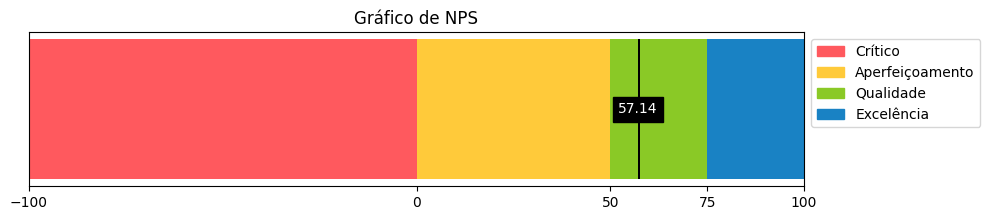

In [12]:
# Vamos importar o matplolib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS = ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75,100]
NPS_CORES = ['#ff595E', '#FFCA3A', '#8AC926', '#1982C4']


# Criar gráfico:
def criar_gráfico_nps(nps):
    fig, ax = plt.subplots(figsize=(10, 2))
    
    for i, zona in enumerate(NPS_ZONAS):
        ax.barh([0], width=NPS_VALORES[i+1] - NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])
        
    ax.barh([0], width=0.5, left=nps, color='black')
    ax.set_yticks([])
    ax.set_xlim(-100, 100)
    ax.set_xticks(NPS_VALORES)
    
    plt.text(nps, 0, f'{nps:.2f}', ha='center', va='center', color='white', bbox=dict(facecolor="black"))
    
    patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
    plt.legend(handles=patches, bbox_to_anchor=(1, 1))
    plt.title('Gráfico de NPS')
    
    
    plt.show()
    
criar_gráfico_nps(nps)